In [61]:
# Importing Libraries

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import plotly.express as px
import matplotlib.pyplot as plt

In [63]:
# Reading data-set

In [64]:
df = pd.read_csv('TSLA.csv')

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [66]:
#EDA

In [67]:
df.info()  #hooraaaaaa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [68]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


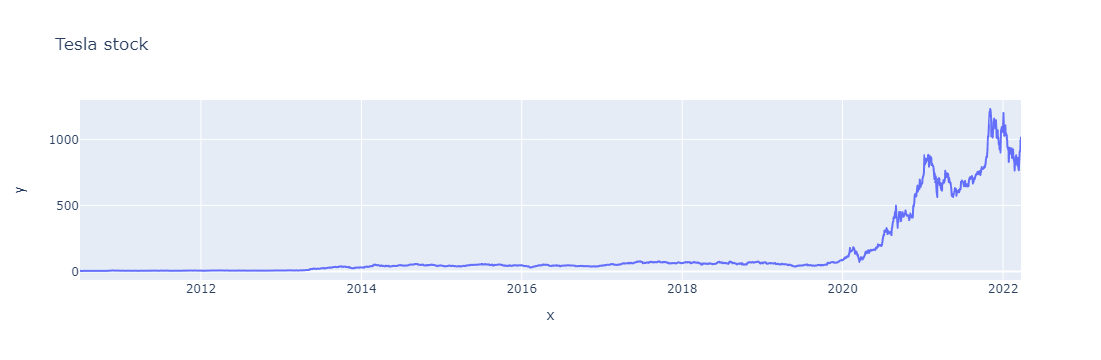

In [69]:
px.line(x=df['Date'], y=df['Close'], title='Tesla stock')

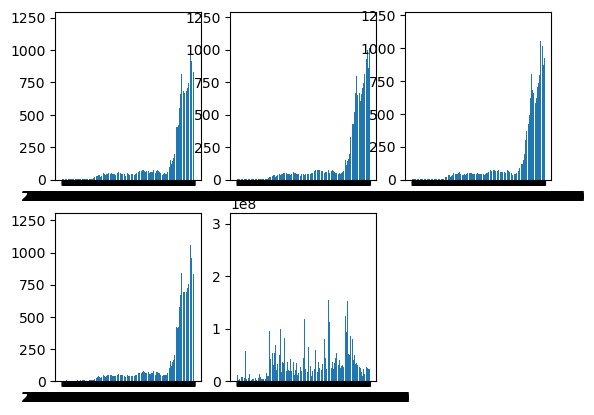

In [9]:
labels = ['Open', 'Close', 'Low', 'High', 'Volume']
for i, col in enumerate(labels):
    plt.subplot(2,3,i+1)
    plt.bar(x=df['Date'],height=df[col])
plt.show()

In [70]:
# Feature Engineering

In [71]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [72]:
splitted = df['Date'].str.split('-', expand=True)
df['Day'] = splitted[2].astype('int')
df['Month'] = splitted[1].astype('int')
df['Year'] = splitted[0].astype('int')

df

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,29,6,2010
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,30,6,2010
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,1,7,2010
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2,7,2010
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,6,7,2010
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,18,3,2022
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,21,3,2022
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,22,3,2022
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,23,3,2022


In [73]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,is_quarter_end
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,29,6,2010,1
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,30,6,2010,1
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,1,7,2010,0
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2,7,2010,0
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,6,7,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,18,3,2022,1
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,21,3,2022,1
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,22,3,2022,1
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,23,3,2022,1


In [74]:
# Splitting and getting ready to train

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df[['Year', 'Month', 'Day']], df['Close'])

In [76]:
x_train.head()

,Year,Month,Day
1991,2018,5,25
1567,2016,9,19
2792,2021,8,2
1723,2017,5,3
2291,2019,8,6


In [77]:
y_train.head()

1991     55.770000
1567     41.268002
2792    709.669983
1723     62.203999
2291     46.150002
Name: Close, dtype: float64

In [78]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

2217 739
2217 739


In [79]:
# Logestic regression

In [80]:
model = LinearRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

In [81]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_hat))

140.44620173409703


In [82]:
# XGB
model = XGBRegressor()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

In [83]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_hat))

5.078209808680574


In [102]:
date_period = pd.date_range(start='2022-03-25', end='2024-03-25')
new_df = pd.DataFrame()

In [103]:
new_df

""


In [105]:
new_df['Day'] = date_period.day
new_df['Month'] = date_period.month
new_df['Year'] = date_period.year

new_df

,Day,Month,Year
0,25,3,2022
1,26,3,2022
2,27,3,2022
3,28,3,2022
4,29,3,2022
...,...,...,...
727,21,3,2024
728,22,3,2024
729,23,3,2024
730,24,3,2024


In [107]:
new_df['Predicted'] = model.predict(new_df[['Year', 'Month', 'Day']])
new_df

,Day,Month,Year,Predicted
0,25,3,2022,929.449280
1,26,3,2022,924.456970
2,27,3,2022,940.202576
3,28,3,2022,932.112549
4,29,3,2022,925.565308
...,...,...,...,...
727,21,3,2024,922.481018
728,22,3,2024,994.111938
729,23,3,2024,996.041992
730,24,3,2024,920.376465


C:\Users\hossein\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



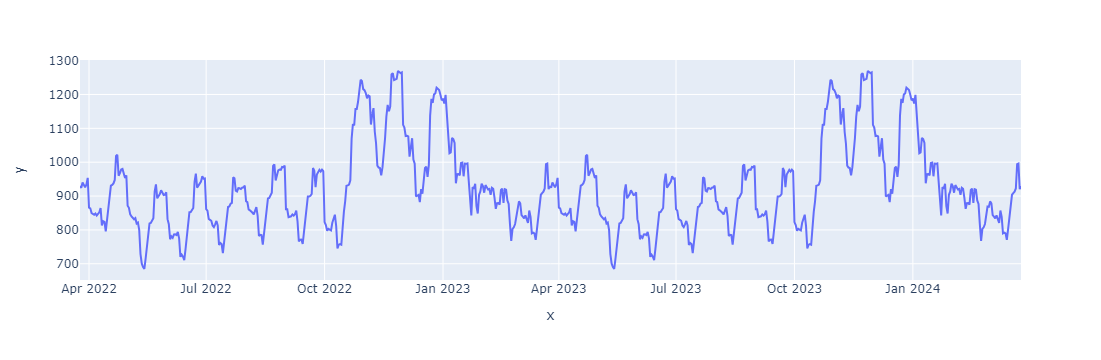

In [108]:
px.line(x=date_period, y=new_df['Predicted'])

In [ ]:
# OK i like that :)